In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import mglearn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Linear Regression**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
model=LinearRegression()

In [61]:
housing=fetch_california_housing()
housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [127]:
print(housing.feature_names)
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Price"]=housing.target
print(df.head())


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [65]:
X_input=housing.data
y_output=housing.target
#spliting training and testing data 
X_train,X_test,y_train,y_test=train_test_split(X_input,y_output,test_size=0.25,random_state=62)

# fitting training data
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_predict = model.predict([X_test[3]])
print("price based on features",y_predict[0])

price based on features 0.8918344302875312


In [84]:
model.coef_
model.intercept_

-35.64536780907912

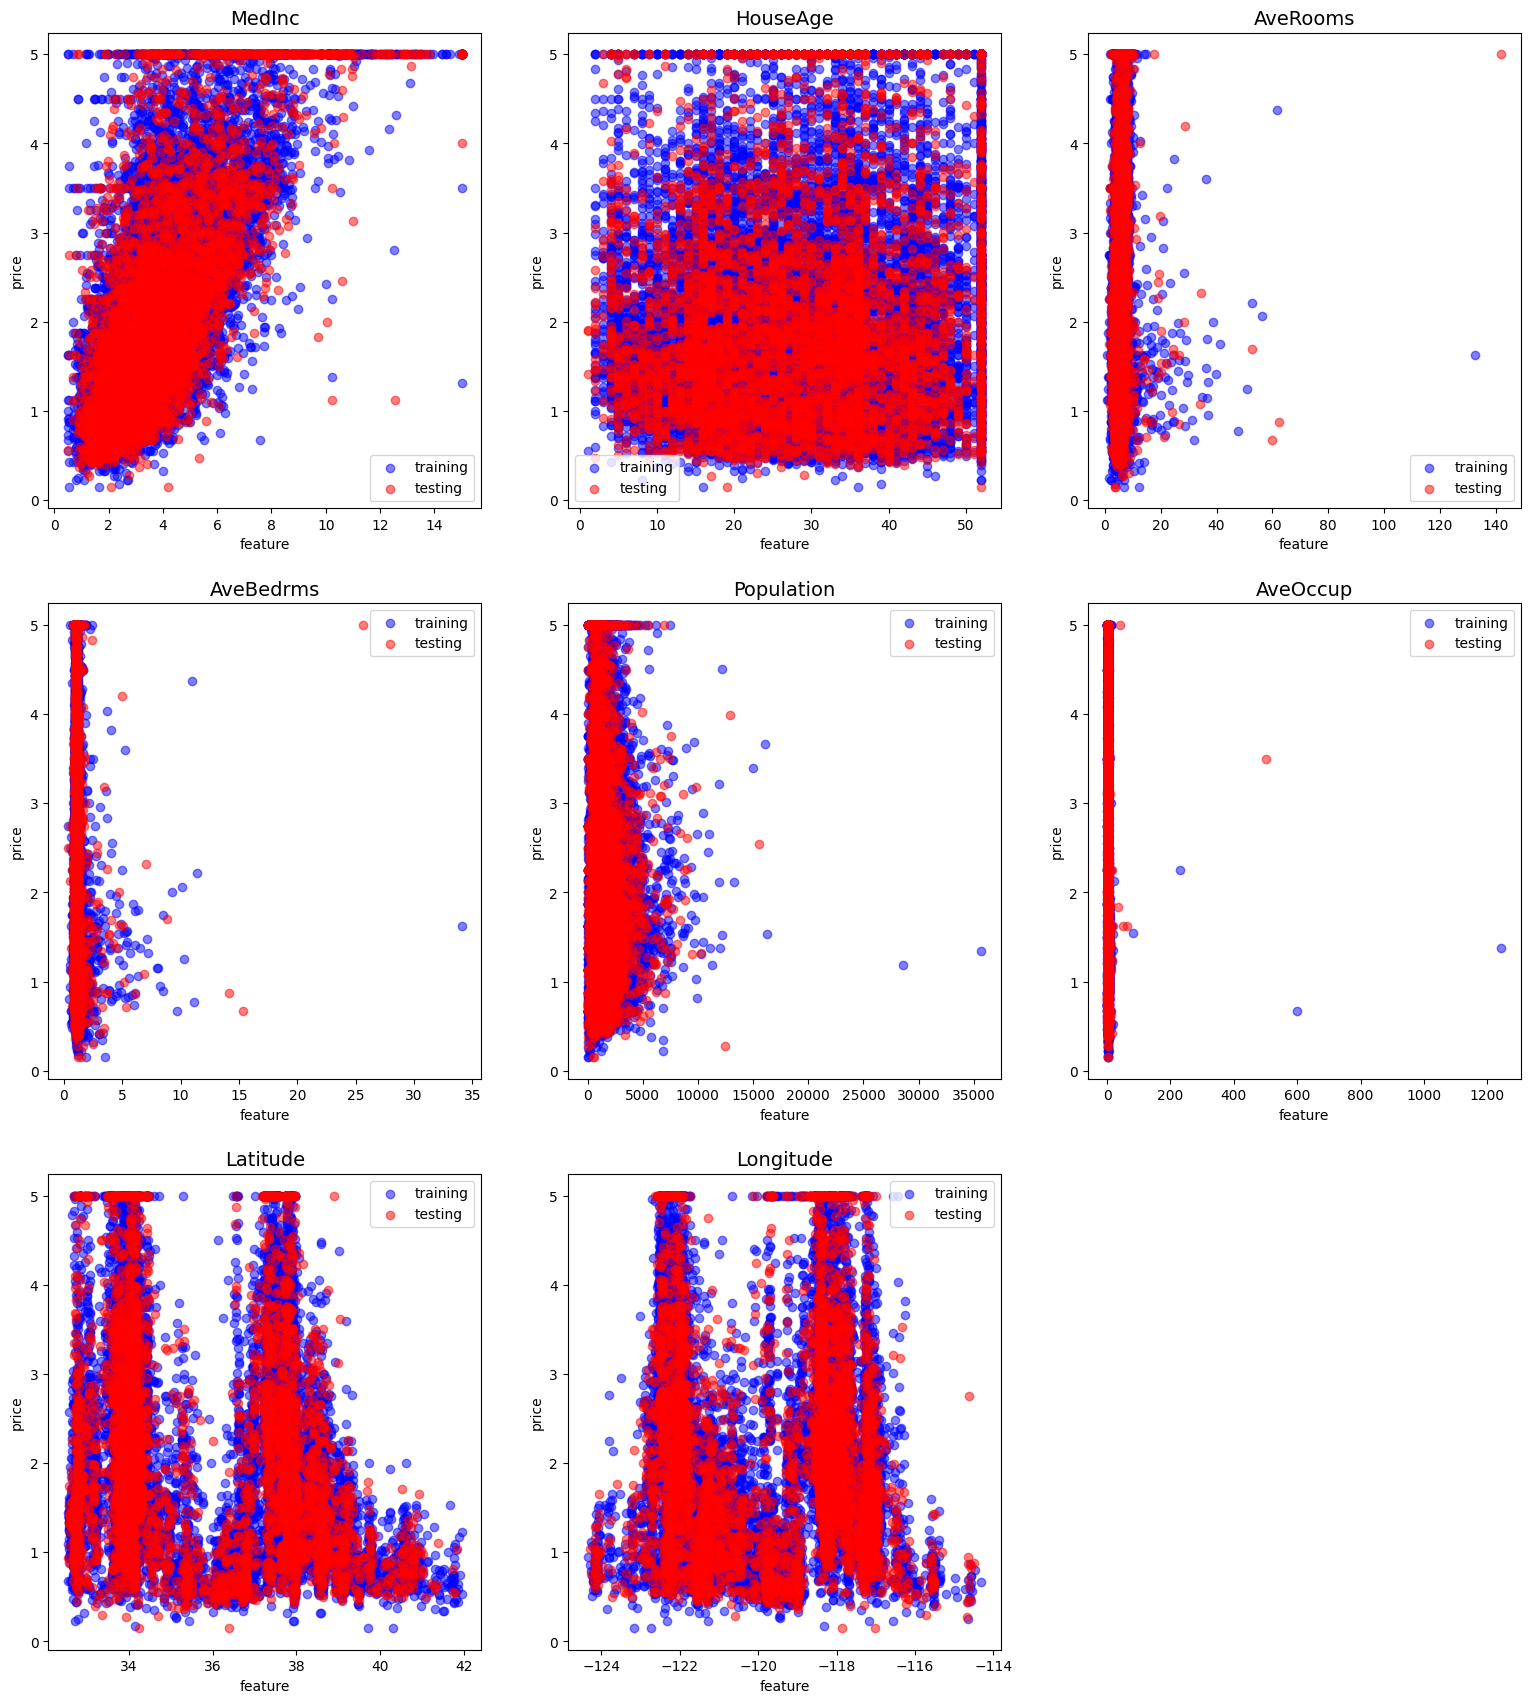

In [143]:
fig,axes=plt.subplots(3,3,figsize=(19,21))
for i,ax in enumerate(axes.ravel()):
    if i<len(housing.feature_names):
        ax.scatter(X_train[:,i],y_train,c='b',alpha=0.5,label="training")
        ax.scatter(X_test[:,i],y_test,c='r',alpha=0.5,label="testing")
        ax.set_title(housing.feature_names[i],fontsize=14)
        ax.set_xlabel("feature")
        ax.set_ylabel("price")
        ax.legend(loc="best")        
    else:
        ax.set_visible(False)

plt.show()

# **Ridge Regression**
* Find the best line of fit by minimizing the errors,similar to Linear Regression
* Add penalty to prevent relying on any particular feature
* If dataset have too many features, then it will remove unnecessary features

 **application:**
  * datasets have too many features
  * high corelation between features
  * noisy data 

In [159]:
from mglearn.datasets import load_extended_boston
from sklearn.linear_model import Ridge

In [163]:
X,y=load_extended_boston()
df=pd.DataFrame(X)
df['Target']=y
df.head()


(506, 104) (506,)


In [181]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
ridge=Ridge().fit(X_train,y_train)
training_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
print("Training score:{:.2f} ".format(training_score))
print("Test score: {:.2f} ".format(test_score))

Training score:0.87 
Test score: 0.81 
